# The Battle of the Neighborhoods - Open a Tea Room in Vancouver

### Capstone Project - IBM Data Science Professional Certificate - Coursera
***

## Table of Contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)
* [References](#references)
***

## Introduction: Business Problem <a name="introduction"></a>

Vancouver is a major city in western Canada, located in the region of British Columbia. It is one of the most ethnically and linguistically diverse cities in Canada. Almost half of its residents are not native English speakers and belong to visible minority groups, mostly Asians. With its location on the Pacific Rim and at the western terminus of Canada's transcontinental highway and rail routes, Vancouver is one of the nation's largest industrial centres, and it's scenic location makes it a major tourist destination.

In many asian countries, a teahouse is traditionally a place which offers tea to its customers, alongside with small plates of food. People gather at teahouses to chat, socialize and enjoy tea, and young people often meet at teahouses for dates. Tea rooms are also popular in Commonwealth countries, particularly Canada, with its harsh winters when afternoon tea is popular. The menu will generally have pastries, butter tarts or other small desserts. 

All these factors combined make of Vancouver a perfect city to open a Tea Room. In this project I will try to find an optimal location for a "Tea Room & Pastries" shop. Specifically, __this report will be targeted to stakeholders interested in opening a Tea Room in Vancouver, Canada__.

I will try to detect locations that are not already crowded with tea rooms, coffee shops and similar venues. I will take into account the city's neighborhoods demographic diversity and the proximity to tourist attractions to evaluate each location's potential attractiveness to customers.

I will use my data science skills to find the most promissing neighborhoods based on this criteria. Advantages of each area will be described so that the best possible final location can be chosen by stakeholders.

***

## Data <a name="data"></a>

Based on the definition of the problem, the following factors will guide this analysis:
* The number of existing similar venues in the neighborhood (other tea rooms, breakfast spots, coffee shops, etc.)
* The proximity to tourist attractions.
* Each neighborhoods' demographics and its residential or commercial character.

I will use the [postal codes of British Columbia](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V) to find Vancouver's neighborhoods names and postal codes. 

I will use the following resources to extract/generate the required information:
- To get the center coordinates of each postal code I will use __Geopy__.
- The data about venues (name, type and location) for each neighborhood will be obtained using **Foursquare API**.
- To find information about the city and it's demographics, I will use [Vancouver's Wikipedia page](https://en.wikipedia.org/wiki/Vancouver), [the city of Vancouver's website](vancouver.ca) and [Tourism Vancouver's website](www.tourismvancouver.com).
***

## Methodology <a name="methodology"></a>

First, I will collect the required data: postal codes and names of Vancouver's neighborhoods, and their location data. For this I will use __BeautifulSoup__ and __geopy__ libraries.

Second, I will use the __Foursquare API__ to explore the neighborhoods. I will set the limit at 100 venues and the radius at 1000 meters for each postal code from their given latitude and longitude coordinates.

Third, I will create clusters of locations in the city using __scikit-learn K-Means algorithm__ to find the areas where Tea Rooms and similar venues are already located. Once I have found these I will analyse the characteristics of the different city clusters (using information available online) to evaluate which locations could be a good spot to open a new Tea Room in Vancouver.

I will use the __folium__ library to visualize the geospatial data and the __matplotlib__ and __seaborn__ libraries to draw informative graphics to better describe my findings.

### 1. Webscraping and procuring geospatial data

Let's start by importing the necessary libraries:

In [1]:
import requests
import os
import pandas as pd
import numpy as np
import json

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe >>> DO I NEED THIS? @@@@@@@@@@@@@@@@@@

from bs4 import BeautifulSoup

import matplotlib.cm as cm
import matplotlib.colors as colors
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Let's start by searching for the postal codes and the names of Vancouver's neighborhoods. Postal codes beginning with V are located within the Canadian province of British Columbia, where Vancouver is located. So I will start by scraping the list of postal codes of Canada from Wikipedia.

In [2]:
# retrieve the URL and create a BeautifulSoup object
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V'
bc_wiki = requests.get(url)
soup = BeautifulSoup(bc_wiki.content, "lxml")

table = soup.find_all('table')[0]
df = pd.read_html(str(table))
bc_data = pd.DataFrame(df[0])
bc_data.rename(columns={'Postcode': 'PostalCode', 'Borough': 'Borough', 'Neighbourhood': 'Neighborhood'}, inplace=True)
print(bc_data.shape)
bc_data.head()

(20, 9)


,0,1,2,3,4,5,6,7,8
0,V1AKimberley,V2APenticton,V3ALangley Township(Langley City),V4ASurreySouthwest,V5ABurnaby(Government Road / Lake City / SFU /...,V6AVancouver(Strathcona / Chinatown / Downtown...,V7ARichmondSouth,V8APowell River,V9AVictoria(Vic West / Esquimalt)Canadian Forc...
1,V1BVernonEast,V2BKamloopsNorthwest,V3BPort CoquitlamCentral,V4BWhite Rock,V5BBurnaby(Parkcrest-Aubrey / Ardingley-Sprott),V6BVancouver(NE Downtown / Gastown / Harbour C...,V7BRichmond(Sea Island / YVR),V8BSquamish,V9BVictoria(West Highlands / North Langford / ...
2,V1CCranbrook,V2CKamloopsCentral and Southeast,V3CPort CoquitlamSouth,V4CDeltaNortheast,V5CBurnaby(Burnaby Heights / Willingdon Height...,V6CVancouver(Waterfront / Coal Harbour / Canad...,V7CRichmondNorthwest,V8CKitimat,V9CVictoria(Colwood / South Langford / Metchosin)
3,V1ESalmon Arm,V2EKamloopsSouth and West,V3ECoquitlamNorth,V4EDeltaEast,V5EBurnaby(Lakeview-Mayfield / Richmond Park /...,V6EVancouver(SE West End / Davie Village),V7ERichmondSouthwest,V8EWhistler,V9EVictoria(East Highlands / NW Saanich)
4,V1GDawson Creek,V2GWilliams Lake,V3GAbbotsfordEast,V4GDeltaEast Central,V5GBurnaby(Cascade-Schou / Douglas-Gilpin),V6GVancouver(NW West End / Stanley Park),V7GNorth Vancouver (district municipality)Oute...,V8GTerrace,V9GLadysmith


In this table, each data cell contains a postal code and the city and neighborhood/s it has been assigned to. I will rearrange this data to create a new dataframe with columns named "PostalCode", "City" and "Neighborhood", keeping only Vancouver's postal codes.

In [3]:
### create one list for each column of bc_data
zero = bc_data[0].tolist()
one = bc_data[1].tolist()
two = bc_data[2].tolist()
three = bc_data[3].tolist()
four = bc_data[4].tolist()
five = bc_data[5].tolist()
six = bc_data[6].tolist()
seven = bc_data[7].tolist()
eight = bc_data[8].tolist()

In [4]:
### concatenate all lists and convert to pd.Series
bc_series = pd.Series([zero, one, two, three, four, five, six, seven, eight])
bc_series = bc_series.sum()
### convert Series to DataFrame
bc_df = pd.DataFrame(bc_series)
bc_df.head()

,0
0,V1AKimberley
1,V1BVernonEast
2,V1CCranbrook
3,V1ESalmon Arm
4,V1GDawson Creek


In [5]:
### split data into 2 columns: PostalCode, City-Neighborhood
bc_df['PostalCode'] = bc_df[0].str[:3]
bc_df['City-Neighborhood'] = bc_df[0].str[3:]
bc_df.head(10)

,0,PostalCode,City-Neighborhood
0,V1AKimberley,V1A,Kimberley
1,V1BVernonEast,V1B,VernonEast
2,V1CCranbrook,V1C,Cranbrook
3,V1ESalmon Arm,V1E,Salmon Arm
4,V1GDawson Creek,V1G,Dawson Creek
5,V1HVernonWest,V1H,VernonWest
6,V1JFort St. John,V1J,Fort St. John
7,V1KMerritt,V1K,Merritt
8,V1LNelson,V1L,Nelson
9,V1MLangley TownshipNorth,V1M,Langley TownshipNorth


In [6]:
### create a subdf with Vancouver's data only
vancouver_df = bc_df[bc_df['City-Neighborhood'].str.startswith('Vancouver')]
print(vancouver_df.shape)
vancouver_df.head()

(31, 3)


,0,PostalCode,City-Neighborhood
87,V5KVancouver(North Hastings-Sunrise),V5K,Vancouver(North Hastings-Sunrise)
88,V5LVancouver(North Grandview-Woodland),V5L,Vancouver(North Grandview-Woodland)
89,V5MVancouver(South Hastings-Sunrise / North Re...,V5M,Vancouver(South Hastings-Sunrise / North Renfr...
90,V5NVancouver(South Grandview-Woodland / NE Ken...,V5N,Vancouver(South Grandview-Woodland / NE Kensin...
91,V5PVancouver(SE Kensington-Cedar Cottage / Vic...,V5P,Vancouver(SE Kensington-Cedar Cottage / Victor...


In [7]:
### split City-Neighborhood into 2 columns, named City and Neighborhood
vancouver_df[['City', 'Neighborhood']] = vancouver_df['City-Neighborhood'].str.split('(', expand=True)
### remove the ending ')' from 'Neighborhood' column
vancouver_df['Neighborhood'] = vancouver_df['Neighborhood'].str[:-1]
### drop columns with repeated data
vancouver_df.drop(columns=[0, 'City-Neighborhood'], inplace=True)
vancouver_df.head()

/home/alina/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/home/alina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/alina/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

,PostalCode,City,Neighborhood
87,V5K,Vancouver,North Hastings-Sunrise
88,V5L,Vancouver,North Grandview-Woodland
89,V5M,Vancouver,South Hastings-Sunrise / North Renfrew-Colling...
90,V5N,Vancouver,South Grandview-Woodland / NE Kensington-Cedar...
91,V5P,Vancouver,SE Kensington-Cedar Cottage / Victoria-Fraserview


In [8]:
### to avoid problems with SettingWithCopyWarning, I deep copy the df before reseting the index
vancouver_data = vancouver_df.copy()
vancouver_data.reset_index(drop=True, inplace=True)

In [9]:
vancouver_data.head()

,PostalCode,City,Neighborhood
0,V5K,Vancouver,North Hastings-Sunrise
1,V5L,Vancouver,North Grandview-Woodland
2,V5M,Vancouver,South Hastings-Sunrise / North Renfrew-Colling...
3,V5N,Vancouver,South Grandview-Woodland / NE Kensington-Cedar...
4,V5P,Vancouver,SE Kensington-Cedar Cottage / Victoria-Fraserview


Now that I have Vancouver's postal codes, let's find their coordinates with geopy:

In [10]:
from geopy.geocoders import Nominatim # convert an address or postal code into latitude and longitude values

lat = []
long = []

for postal_code in list(vancouver_data['PostalCode']):
    print(postal_code)
    geolocator = Nominatim(user_agent="vancouver_explorer")
    location = geolocator.geocode(postal_code)
    try:
        lat.append(location.latitude)
        long.append(location.longitude)
    except AttributeError: 
        print('---', postal_code)   # this will let me know if there are any coordinates missing
        continue

print("Number of latitude and longitude coordinates found: ", len(lat), '-', len(long), '\n')
print("Latitude coordinates: ", lat, '\n')
print("Longitude coordinates: ", long)

V5K
V5L
V5M
V5N
V5P
V5R
V5S
V5T
--- V5T
V5V
V5W
V5X
V5Y
--- V5Y
V5Z
V6A
V6B
V6C
V6E
V6G
V6H
V6J
V6K
V6L
V6M
V6N
V6P
V6R
V6S
--- V6S
V6T
V6Z
V7X
V7Y
Number of latitude and longitude coordinates found:  28 - 28 

Latitude coordinates:  [49.28171754656246, 49.280200918758624, 49.26007804182507, 49.2646254249102, 49.22275092852469, 49.239822993458404, 49.21604993652559, 49.248424877991, 49.23626244835694, 49.21542495297729, 49.25668694119318, 49.27358514239091, 49.27811172378708, 49.287716588954346, 49.28801282544443, 49.3002702, 49.25680023082197, 49.260907082479285, 49.26895274770836, 49.25123526871763, 49.23445241369216, 49.224594327808234, 49.218349248173894, 49.26911800091252, 49.274648, 49.27844786726529, 49.28600408893013, 49.282806433536955] 

Longitude coordinates:  [-123.0400063294856, -123.06656328873324, -123.0401599764032, -123.06586883849849, -123.06756094152627, -123.04080030032974, -123.04095993051983, -123.09060263719377, -123.09288184184227, -123.09779804646165, -123.1211

For some reason geopy cannot find postal codes V5T, V5Y, V6S, which are assigned to neighborhoods "East Mount Pleasant", "West Mount Pleasant / West Riley Park-Little M..." and "NW Dunbar-Southlands / Chaldecutt / South Univ..." respectively. Since it's only 3 postal codes, I will use Google Maps Search Option to find them:

Google Maps search results:

- V5T: 49.264724, -123.092574
- V5Y: 49.252015, -123.110748
- V6S: 49.251210, -123.225418

I will now insert these values in the 'lat' and 'long' lists, and then create a new dataframe with Vancouver's postal codes coordinates:

In [11]:
# values to insert
postal_codes = list(vancouver_data['PostalCode'])
pc_to_insert = ['V5T', 'V5Y', 'V6S']
lat_to_insert = [49.264724, 49.252015, 49.251210]
long_to_insert = [-123.092574, -123.110748, -123.225418]

print("Number of values in lat and long lists before the insert:", len(lat), '-' ,len(long))

for pc in pc_to_insert:
    index = postal_codes.index(pc)
    lat.insert(index, lat_to_insert[pc_to_insert.index(pc)])
#     print(lat_to_insert[pc_to_insert.index(pc)])
    long.insert(index, long_to_insert[pc_to_insert.index(pc)])
#     print(long_to_insert[pc_to_insert.index(pc)])

print("Number of values in lat and long lists after the insert:", len(lat), '-' ,len(long))

Number of values in lat and long lists before the insert: 28 - 28
Number of values in lat and long lists after the insert: 31 - 31


Good, now I have a complete list of Vancouver's postal codes and their latitude and longitude coordinates. Let's save that data in a .csv file before moving on with the analysis:

In [61]:
# df = pd.DataFrame(list(zip(list(vancouver_data['PostalCode']), lat, long)), columns=['PostalCode', 'Latitude', 'Longitude'])
# df.to_csv('Vancouver_coordinates.csv', index=False)

And now I can read that data into a dataframe:

In [12]:
# create dataframe with coordinates data for Vancouver's neighborhoods
vancouver_coord = pd.read_csv('Vancouver_coordinates.csv')
vancouver_coord.head()

,PostalCode,Latitude,Longitude
0,V5K,49.283277,-123.043293
1,V5L,49.279853,-123.068277
2,V5M,49.265358,-123.049119
3,V5N,49.259254,-123.072063
4,V5P,49.230668,-123.071843


OK, so now I have all the postal codes, neighborhood names and their coordinates! Let's merge all that into a single dataframe named 'neighborhoods':

In [13]:
# merge dataframes
neighborhoods = vancouver_data.merge(vancouver_coord, how='inner', on='PostalCode')
neighborhoods.head()

,PostalCode,City,Neighborhood,Latitude,Longitude
0,V5K,Vancouver,North Hastings-Sunrise,49.283277,-123.043293
1,V5L,Vancouver,North Grandview-Woodland,49.279853,-123.068277
2,V5M,Vancouver,South Hastings-Sunrise / North Renfrew-Colling...,49.265358,-123.049119
3,V5N,Vancouver,South Grandview-Woodland / NE Kensington-Cedar...,49.259254,-123.072063
4,V5P,Vancouver,SE Kensington-Cedar Cottage / Victoria-Fraserview,49.230668,-123.071843


In [14]:
print('The dataframe has {} postal codes.'.format(len(neighborhoods['Neighborhood'].unique())))

The dataframe has 31 postal codes.


Let's see what this data looks like in a map:

In [15]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Vancouver, BC, Canada'
geolocator = Nominatim(user_agent="vancouver_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of the city of Vancouver are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of the city of Vancouver are 49.2608724, -123.1139529.


In [16]:
# create map of Vancouver using latitude and longitude values
map_vancouver = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(neighborhoods['Latitude'], 
                                  neighborhoods['Longitude'],
                                  neighborhoods['Neighborhood']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='lightgreen',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vancouver)

map_vancouver

# The map might not be visible on Github. Check out the README for the map.

### 2. Explore Vancouver's Neighborhoods

Now that I have the required geospatial data, let's use the Foursquare API to get info on venues for each neighborhood.

I am particularly interested in venues related to the "Tea & Pastries" categories to use that data to create the clusters, but I will request information on all categories to use it later on the analysis of each of the city's clusters.

In [17]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'OC30BIT0T1C1DAJAXAUJGG1H3MQ1XOOZULL5ZWMARRVZFR0K' # your Foursquare ID
CLIENT_SECRET = 'NGO53AGQLJYHRMVAADNXU2QXJX1SLPK5M3HSMNTOWZQUMJZY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    """ names, latitudes, longitudes are columns from a dataframe. """
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                  'Neighborhood Latitude',
                  'Neighborhood Longitude',
                  'Venue',
                  'Venue Latitude',
                  'Venue Longitude',
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
# Run the above function on each neighborhood and create a new dataframe called vancouver_venues.
vancouver_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                            latitudes=neighborhoods['Latitude'],
                            longitudes=neighborhoods['Longitude'])

North Hastings-Sunrise
North Grandview-Woodland
South Hastings-Sunrise / North Renfrew-Collingwood
South Grandview-Woodland / NE Kensington-Cedar Cottage
SE Kensington-Cedar Cottage / Victoria-Fraserview
South Renfrew-Collingwood
Killarney
East Mount Pleasant
West Kensington-Cedar Cottage / NE Riley Park-Little Mountain
SE Riley Park-Little Mountain / SW Kensington-Cedar Cottage / NE Oakridge / North Sunset
SE Oakridge / East Marpole / South Sunset
West Mount Pleasant / West Riley Park-Little Mountain
East Fairview / South Cambie
Strathcona / Chinatown / Downtown Eastside
NE Downtown / Gastown / Harbour Centre / International Village / Victory Square / Yaletown
Waterfront / Coal Harbour / Canada Place
SE West End / Davie Village
NW West End / Stanley Park
West Fairview / Granville Island / NE Shaughnessy
NW Shaughnessy / East Kitsilano / Quilchena
Central Kitsilano / Greektown
NW Arbutus Ridge / NE Dunbar-Southlands
South Shaughnessy / NW Oakridge / NE Kerrisdale / SE Arbutus Ridge
Wes

In [20]:
# save the venue data to a .csv file
vancouver_venues.to_csv('Vancouver_venues.csv', index=False)

print(vancouver_venues.shape)
vancouver_venues.head()

(2186, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North Hastings-Sunrise,49.283277,-123.043293,The Fair at the PNE,49.282971,-123.042109,Fair
1,North Hastings-Sunrise,49.283277,-123.043293,Livestock Barns,49.284037,-123.039278,Farm
2,North Hastings-Sunrise,49.283277,-123.043293,Pacific Coliseum,49.285823,-123.042727,Hockey Arena
3,North Hastings-Sunrise,49.283277,-123.043293,Tamam Fine Palestinian Cuisine,49.281070,-123.051438,Middle Eastern Restaurant
4,North Hastings-Sunrise,49.283277,-123.043293,Bao Chau,49.281232,-123.048971,Vietnamese Restaurant


Foursquare API has returned 2186 venues, let's see how many venues per neighborhood:

In [21]:
# Let's check how many venues were returned for each neighborhood
pd.set_option('display.max_rows', None)
vancouver_venues_grouped = vancouver_venues.groupby('Neighborhood').count().reset_index()
vancouver_venues_grouped.sort_values('Venue', ascending=False)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bentall Centre,100,100,100,100,100,100
9,NW West End / Stanley Park,100,100,100,100,100,100
27,West Kensington-Cedar Cottage / NE Riley Park-...,100,100,100,100,100,100
25,Waterfront / Coal Harbour / Canada Place,100,100,100,100,100,100
23,Strathcona / Chinatown / Downtown Eastside,100,100,100,100,100,100
18,SW Downtown,100,100,100,100,100,100
17,SE West End / Davie Village,100,100,100,100,100,100
12,Pacific Centre,100,100,100,100,100,100
10,North Grandview-Woodland,100,100,100,100,100,100
30,West Mount Pleasant / West Riley Park-Little M...,100,100,100,100,100,100


In [22]:
print(vancouver_venues_grouped.shape)

(31, 7)


The dataset has data for all 31 postal code-defined areas been considered.

Let's take a look at where all these venues are located:

In [23]:
# create map of Vancouver using latitude and longitude values
map_venues = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, venue, venue_cat, in zip(vancouver_venues['Venue Latitude'], 
                                       vancouver_venues['Venue Longitude'],
                                       vancouver_venues['Venue'],
                                       vancouver_venues['Venue Category']
                                            ):
    label = '{}, {}'.format(venue, venue_cat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='lightblue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_venues)

map_venues

# The map might not be visible on Github. Check out the README for the map.

The northern side of the city has the highest density of venues in this dataset. READ ABOUT VANCOUVER AND ADD A LITTLE INFO, LIKE 'THE SOUTHERN AREAS OF VANCOUVER ARE ~ INDUSTRIAL AREAS (CHECK THIS) ETC ETC ETC @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

Let's check how many categories we have and which are the most frequent ones:

In [24]:
print('There are {} uniques categories.'.format(len(vancouver_venues['Venue Category'].unique())))

There are 236 uniques categories.


In [25]:
vancouver_venues.groupby('Venue Category').count().sort_values('Venue', ascending=False)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Coffee Shop,145,145,145,145,145,145
Café,80,80,80,80,80,80
Japanese Restaurant,76,76,76,76,76,76
Hotel,65,65,65,65,65,65
Park,64,64,64,64,64,64
Bakery,63,63,63,63,63,63
Sushi Restaurant,56,56,56,56,56,56
Chinese Restaurant,52,52,52,52,52,52
Vietnamese Restaurant,51,51,51,51,51,51


I will now turn the categorical data about the venues into numerical data using One Hot encoding, where for each neighborhood individual venues are turned into the frequency of how many of those venues are located in each neighborhood.

In [26]:
# # one hot encoding
vancouver_onehot = pd.get_dummies(vancouver_venues[['Venue Category']], prefix="", prefix_sep="")
vancouver_onehot.head()

,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


To create the clusters I only need to include venues that sell tea/juice and pastries/pies/snacks, since they could be competitors for a new Tea Room. So I will create a subdataframe with only those categories:

In [27]:
tea_onehot = vancouver_onehot[['Breakfast Spot', 'Tea Room', 'Creperie']]
tea_onehot.head()

,Breakfast Spot,Tea Room,Creperie
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [28]:
# add neighborhood column back to dataframe
tea_onehot['Neighborhood'] = vancouver_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [tea_onehot.columns[-1]] + list(tea_onehot.columns[:-1])
tea_onehot = tea_onehot[fixed_columns]
tea_onehot = tea_onehot.copy()
# move neighborhood column to the first column
tea_onehot.head()

/home/alina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighborhood,Breakfast Spot,Tea Room,Creperie
0,North Hastings-Sunrise,0,0,0
1,North Hastings-Sunrise,0,0,0
2,North Hastings-Sunrise,0,0,0
3,North Hastings-Sunrise,0,0,0
4,North Hastings-Sunrise,0,0,0


In [39]:
# tea_onehot = tea_onehot.copy()  REMOVE LATER IF NO ISSUES ARISE

Let's examine the new dataframe's size:

In [29]:
tea_onehot.shape

(2186, 4)

In [30]:
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
pd.set_option('display.max_rows', 10)

tea_grouped = tea_onehot.groupby('Neighborhood').mean().reset_index()
tea_grouped

,Neighborhood,Breakfast Spot,Tea Room,Creperie
0,Bentall Centre,0.010000,0.010000,0.00
1,Central Kitsilano / Greektown,0.010101,0.010101,0.00
2,East Fairview / South Cambie,0.030000,0.000000,0.00
3,East Mount Pleasant,0.010000,0.010000,0.00
4,Killarney,0.000000,0.000000,0.00
...,...,...,...,...
26,West Fairview / Granville Island / NE Shaughnessy,0.032967,0.000000,0.00
27,West Kensington-Cedar Cottage / NE Riley Park-...,0.030000,0.010000,0.00
28,West Kerrisdale / South Dunbar-Southlands / Mu...,0.000000,0.000000,0.00
29,West Kitsilano / West Point Grey / Jericho,0.000000,0.000000,0.00


In [ ]:
# # Sort the venues in descending order
# def return_most_common_venues(row, num_top_venues):
#     row_categories = row.iloc[1:]
#     row_categories_sorted = row_categories.sort_values(ascending=False)
    
#     return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
# # Create the new dataframe and display the top 5 venues for each neighborhood. 
# num_top_venues = 3

# indicators = ['st', 'nd', 'rd']

# # create columns according to number of top venues
# columns = ['Neighborhood']
# for ind in np.arange(num_top_venues):
#     try:
#         columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
#     except:
#         columns.append('{}th Most Common Venue'.format(ind+1))

# # create a new dataframe
# neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
# neighborhoods_venues_sorted['Neighborhood'] = tea_grouped['Neighborhood']

# for ind in np.arange(tea_grouped.shape[0]):
#     neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tea_grouped.iloc[ind, :], num_top_venues)

# neighborhoods_venues_sorted.head()

***

### 3. Cluster Neighborhoods

#### 3.1 Elbow Method to determine the optimal value of k
In order to start working with the k-Means algorithm it is necessary to determine the optimal number of clusters into which the data may be clustered. To do this we iterate the values of k from 1 to 9 and calculate the value of the distortions (_Distortion: the average of the squared distances from the cluster centers of the respective clusters_) and inertia (_Inertia: the sum of squared distances of samples to their closest cluster center_) for each value of k in the given range. The optimal number of clusters will be the value of k at the "elbow" (the point after which the distortion/inertia starts decreasing in a linear fashion).

In [31]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# drop 'Neighborhood' column before clustering
tea_grouped_clustering = tea_grouped.drop('Neighborhood', 1)

In [33]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(tea_grouped_clustering)
    kmeanModel.fit(tea_grouped_clustering)
 
    distortions.append(sum(np.min(cdist(tea_grouped_clustering, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / tea_grouped_clustering.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(tea_grouped_clustering, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / tea_grouped_clustering.shape[0]
    mapping2[k] = kmeanModel.inertia_

#### 3.2 Tabulating and Visualizing the results:

In [35]:
# Using the different values of Distortion:
print("values of Distortion")
for key, val in mapping1.items():
    print(f'{key} : {val}')

# Using the different values of Inertia:
print("\n values of Inertia")
for key, val in mapping2.items():
    print(f'{key} : {val}')

values of Distortion
1 : 0.014486830229479518
2 : 0.00788026017972037
3 : 0.006217781721069326
4 : 0.0028434918609938427
5 : 0.0020426841331946844
6 : 0.0016824626768474403
7 : 0.0013606012614697238
8 : 0.0008142630030767302
9 : 0.00033039203533479487

 values of Inertia
1 : 0.008458282252481603
2 : 0.0030648192617291235
3 : 0.0013610181211970375
4 : 0.0006004946566331683
5 : 0.0003688257265524443
6 : 0.000279323197655976
7 : 0.000194323197655976
8 : 0.00010831982579401827
9 : 3.331982579401826e-05


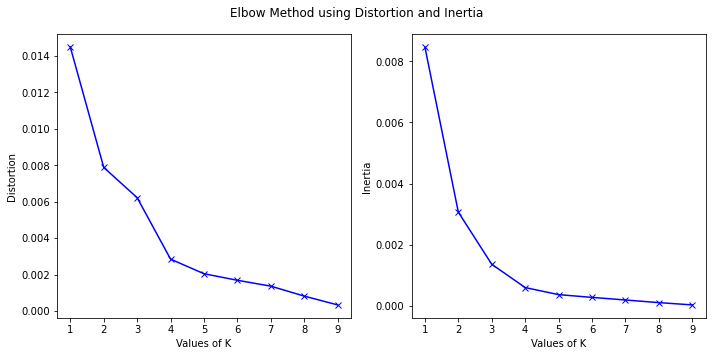

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Elbow Method using Distortion and Inertia')

ax1.plot(K, distortions, 'bx-')
ax1.set(xlabel='Values of K', ylabel='Distortion')

ax2.plot(K, inertias, 'bx-')
ax2.set(xlabel='Values of K', ylabel='Inertia')
fig.tight_layout()

As shown in the plots, for this dataset the optimal value of k is 4. Now I can apply the k-Means algorithm using this value to create the clusters and continue with my analysis:

In [62]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tea_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 1, 0, 2, 1, 2, 2, 1, 1], dtype=int32)

Let's create a new dataframe that includes the cluster label as well as the frequencies of the tea-related venues for each neighborhood:

In [63]:
# add clustering labels to the df
tea_grouped.insert(0, 'Cluster Labels', kmeans.labels_)#, allow_duplicates=True)  # REMOVE THIS @@@@@@@@@@@@@@@@@@@@@@@@

tea_merged = neighborhoods

# merge dataframes to add latitude/longitude for each neighborhood
tea_merged = tea_merged.join(tea_grouped.set_index('Neighborhood'), on='Neighborhood')

In [65]:
tea_merged

,PostalCode,City,Neighborhood,Latitude,Longitude,Cluster Labels,Breakfast Spot,Tea Room,Creperie
0,V5K,Vancouver,North Hastings-Sunrise,49.283277,-123.043293,2,0.000000,0.00,0.0
1,V5L,Vancouver,North Grandview-Woodland,49.279853,-123.068277,1,0.030000,0.00,0.0
2,V5M,Vancouver,South Hastings-Sunrise / North Renfrew-Colling...,49.265358,-123.049119,1,0.037037,0.00,0.0
3,V5N,Vancouver,South Grandview-Woodland / NE Kensington-Cedar...,49.259254,-123.072063,2,0.000000,0.00,0.0
4,V5P,Vancouver,SE Kensington-Cedar Cottage / Victoria-Fraserview,49.230668,-123.071843,2,0.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...
26,V6S,Vancouver,NW Dunbar-Southlands / Chaldecutt / South Univ...,49.251210,-123.225418,2,0.000000,0.00,0.0
27,V6T,Vancouver,UBC,49.271268,-123.239269,2,0.000000,0.00,0.0
28,V6Z,Vancouver,SW Downtown,49.275885,-123.131725,0,0.000000,0.01,0.0
29,V7X,Vancouver,Bentall Centre,49.285967,-123.119531,0,0.010000,0.01,0.0


Let's visualize the cluster in a map. First, let's assign colors to the different cluster labels and add this to 'tea_merged' df in a new column "MarkerColor":

In [66]:
### Assign colors to the different Cluster Labels and replace with these new values the column named 'MarkerColor'
# get a list of labels to iterate over
labels = list(tea_merged['Cluster Labels'])

marker_color = [] 
for label in labels:
    if label == 0:
        marker_color.append('red')
    elif label == 1:
        marker_color.append('blue')
    elif label == 2:
        marker_color.append('green')
    elif label == 3:
        marker_color.append('orange')
# add colors to df in a new column     
tea_merged['MarkerColor'] = marker_color
tea_merged.head()

,PostalCode,City,Neighborhood,Latitude,Longitude,Cluster Labels,Breakfast Spot,Tea Room,Creperie,MarkerColor
0,V5K,Vancouver,North Hastings-Sunrise,49.283277,-123.043293,2,0.000000,0.0,0.0,green
1,V5L,Vancouver,North Grandview-Woodland,49.279853,-123.068277,1,0.030000,0.0,0.0,blue
2,V5M,Vancouver,South Hastings-Sunrise / North Renfrew-Colling...,49.265358,-123.049119,1,0.037037,0.0,0.0,blue
3,V5N,Vancouver,South Grandview-Woodland / NE Kensington-Cedar...,49.259254,-123.072063,2,0.000000,0.0,0.0,green
4,V5P,Vancouver,SE Kensington-Cedar Cottage / Victoria-Fraserview,49.230668,-123.071843,2,0.000000,0.0,0.0,green


In [67]:
# create map of Vancouver showing clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood, markercolor in zip(tea_merged['Latitude'],
                                               tea_merged['Longitude'],
                                               tea_merged['Neighborhood'],
                                               tea_merged['MarkerColor']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=markercolor,
        fill=True,
        fill_color=markercolor,
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)

map_clusters

# The map might not be visible on Github. Check out the README for the map.

## Analysis <a name="analysis"></a>

### Examine clusters

In [ ]:
tea_merged.head()

In [ ]:
# create subdf
sub_tea_merged = tea_merged[['Cluster Labels', 'Breakfast Spot', 'Tea Room', 'Creperie']]
# use df.melt to rearrange data before plotting
data = sub_tea_merged.melt('Cluster Labels', var_name='Shop', value_name='Frequencies')

In [ ]:
# avg number tea shops vs cluster
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Cluster Labels", y="Frequencies", hue="Shop", data=data)
ax.set_title("Average Number of Tea & Pastries Shops per Cluster")

# ax=sns.barplot(x='date', y='b', hue='a', data=data)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

There are no "Tea & Pastries" shops in neighborhoods grouped in cluster 2.

Cluster number 1 is the cluster with more Breakfast Spots, followed by cluster 0.

There is only one Creperie (in cluster 1), so this type of shop wouldn't be big competitors. @@@@@@@@@@@@@

Cluster 3 has five times more Tea Rooms than cluster 0, and the difference is even bigger with cluster 1.  

Let's see how many neighborhoods are there in each cluster:

In [ ]:
# create a sub dataframe with only 'Neighborhood', 'Cluster Labels', 'Yoga Studio' columns in it


In [ ]:
# create a sub dataframe with only 'Neighborhood', 'Cluster Labels', ''Breakfast Spot', 'Tea Room' and 'Creperie' columns in it
neighborhoods_cluster = tea_merged[['Neighborhood', 'Cluster Labels', 'Breakfast Spot', 'Tea Room', 'Creperie']]
# group by cluster label and count the number of neighborhoods in each cluster
neighborhoods_per_cluster = neighborhoods_cluster.groupby('Cluster Labels')['Neighborhood'].count().to_frame()
neighborhoods_per_cluster.reset_index(inplace=True)
neighborhoods_per_cluster

In [ ]:
# plot number of neighborhoods vs cluster
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Cluster Labels", y="Neighborhood", data=neighborhoods_per_cluster)
ax.set_title("Number of Neighborhoods per Cluster")

The plots show that the Tea Rooms from cluster 3 are concentrated in a small area of the city &rarr; possible spots?

Cluster 2 has the highest number of neighborhoods and no clusters &rarr; maybe no demand?

The obvious clusters are 0 and 1, evaluate this.

In [ ]:
tea_merged[tea_merged['Cluster Labels'] == 3]

In [ ]:
vancouver_venues[(vancouver_venues['Venue Category'] == 'Tea Room')]

In [ ]:
neighborhoods.loc[(neighborhoods[neighborhoods['PostalCode'] == 'V6M']).index,'Neighborhood']

South Shaughnessy / NW Oakridge / NE Kerrisdale / SE Arbutus Ridge

# &rarr; Explore areas of Vancouver in order to find a good spot to open a "Tea & Pastries" shop.

Consider:
- Areas highly visited by turists
- City demographic diversity
- Areas with no venues like this







READ about South Shaughnessy / NW Oakridge / NE Kerrisdale / SE Arbutus Ridge &rarr; may be a good idea to open a shop there since there is high demand.

https://en.wikipedia.org/wiki/Shaughnessy,_Vancouver

https://en.wikipedia.org/wiki/Oakridge,_Vancouver

https://en.wikipedia.org/wiki/Kerrisdale

https://en.wikipedia.org/wiki/Arbutus_Ridge



***

## Results and Discussion <a name="results"></a>

Write 2-3 paragraphs

***

## Conclusion <a name="conclusion"></a>

Write 2-3 paragraphs
***

## References <a name="references"></a>

https://en.wikipedia.org/wiki/Vancouver

https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V

***

In [ ]:
cluster_0 = tea_merged.loc[tea_merged['Cluster Labels'] == 0,
                           tea_merged.columns[[1] + list(range(5, tea_merged.shape[1]))]]
cluster_0

In [ ]:
# find the mode for each of the first 3 columns
n = 0
for column in cluster_0.columns[1:]:
    print(cluster_0[column].mode())
    n += 1
    if n == 3:
        break

In [ ]:
cluster_1 = tea_merged.loc[tea_merged['Cluster Labels'] == 1,
                           tea_merged.columns[[1] + list(range(5, tea_merged.shape[1]))]]
cluster_1

In [ ]:
# find the mode for each of the first 3 columns
n = 0
for column in cluster_1.columns[1:]:
    print(cluster_1[column].mode())
    n += 1
    if n == 3:
        break